<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/autoencoders/prueba_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from PIL import Image
import requests

# Pruebas previas:


In [ ]:
#cargamos el data set de los gatos y perros
dataset=tfds.load("cats_vs_dogs",split="train",shuffle_files=True,as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteWUU2XF/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
def to_size(image,size):
    return np.array(tf.image.resize(image,size))/255

In [ ]:
images=[]
n=70000
input_shape=(40,40)
for j in dataset.take(n):
    i=tfds.as_numpy(j)
    images.append(to_size(i[0],input_shape))
images=np.array(images)

In [ ]:
del dataset

In [ ]:
#ahora que tenemos los datos vamos a crear los dos dos grupos 
x_train,x_test=train_test_split(images,test_size=0.25,random_state=42)

In [ ]:
del images

In [ ]:
#creamos el autoencoder
input_shape=x_train[1].shape
iner_dim=13**2
model=tf.keras.Sequential()
#encoder
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
model.add(tf.keras.layers.Dense(iner_dim//1.5,activation="relu"))
 
#decoder
model.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
model.add(tf.keras.layers.Dense(input_shape[0]*input_shape[1]*input_shape[2],activation="sigmoid"))
model.add(tf.keras.layers.Reshape(target_shape=input_shape))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 169)               811369    
_________________________________________________________________
dense_9 (Dense)              (None, 112)               19040     
_________________________________________________________________
dense_10 (Dense)             (None, 169)               19097     
_________________________________________________________________
dense_11 (Dense)             (None, 4800)              816000    
_________________________________________________________________
reshape_2 (Reshape)          (None, 40, 40, 3)         0         
Total params: 1,665,506
Trainable params: 1,665,506
Non-trainable params: 0
____________________________________________

In [ ]:
image1=np.array(Image.open(requests.get("https://www.dogtime.com/assets/uploads/2011/03/puppy-development-1280x720.jpg", stream=True).raw))
final_shape=(40,40)
imag_autoencoder=to_size(image1,final_shape)

In [ ]:
#vamos a definir nuestra propia callback para ver como predice sobre una imagen epoca tras epoca, como mejora y como se pasa 
class my_callback(tf.keras.callbacks.Callback):
    #creo que vamos a tener que crear un __init__ para hacer lo de pasar una imagen
    def __init__(self,imagen_array):
        #esto creo que es para que se ereden todas las cosas
        #super(my_callback, self).__init__()
        self.imag=imagen_array
 
    def on_epoch_end(self, epoch, logs=None):
        #queremos probar el modelo en una imagen y queremos que compute
        aux=self.model.predict(self.imag[np.newaxis,...])
        plt.figure(figsize=(14,6))
        plt.subplot(1,2,1)
        plt.imshow(self.imag)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1,2,2)
        plt.imshow(aux[0])
        plt.title(f"Época: {epoch}",fontsize=13)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/{epoch}.png")
        plt.close()

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss="mse")
stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=9)
llamada_mia=my_callback(imag_autoencoder)

In [ ]:
hist=model.fit(x=x_train,y=x_train,epochs=230,batch_size=64,validation_data=(x_test,x_test),callbacks=[llamada_mia])
 
!ffmpeg -f image2 -i /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/%d.png -r 20 /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/video_bueno_6.avi

Epoch 1/230
273/273 [==============================] - 7s 26ms/step - loss: 0.0523 - val_loss: 0.0358
Epoch 2/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0336 - val_loss: 0.0281
Epoch 3/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0261 - val_loss: 0.0244
Epoch 4/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0236 - val_loss: 0.0230
Epoch 5/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 6/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0217 - val_loss: 0.0218
Epoch 7/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0212 - val_loss: 0.0213
Epoch 8/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0207 - val_loss: 0.0208
Epoch 9/230
273/273 [==============================] - 7s 25ms/step - loss: 0.0202 - val_loss: 0.0205
Epoch 10/230
273/273 [==============================] - 7s 25ms/step - loss: 0.020

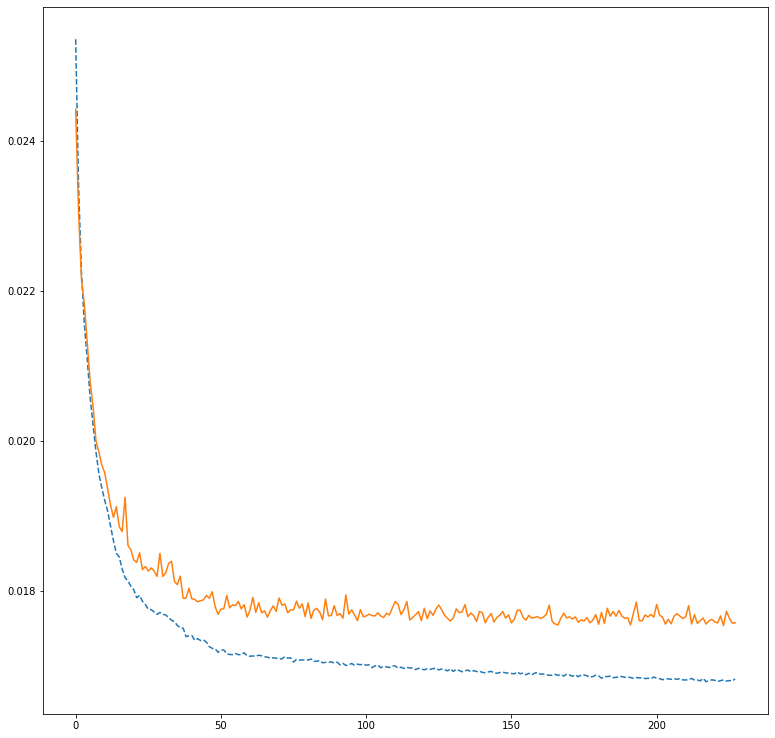

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(hist.history["loss"][2:],"--")
plt.plot(hist.history["val_loss"][2:])

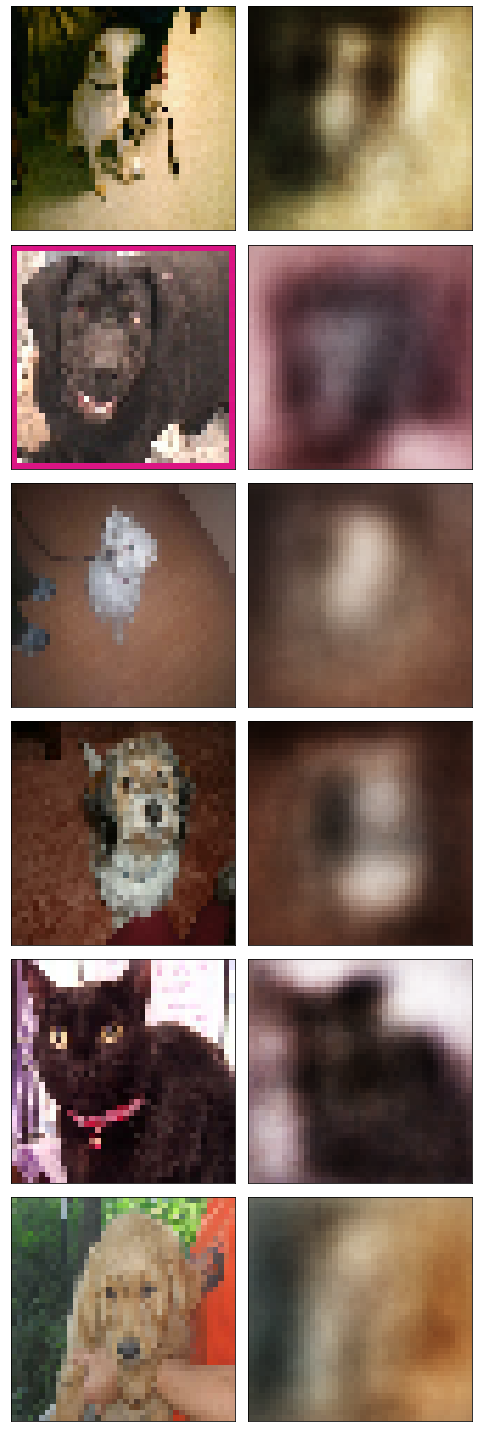

In [ ]:
plt.figure(figsize=(7,20))
for i in range(6):
    predict=model.predict(x_test[i][np.newaxis,...])
    plt.subplot(6,2,i*2+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(6,2,i*2+2)
    plt.imshow(predict[0])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

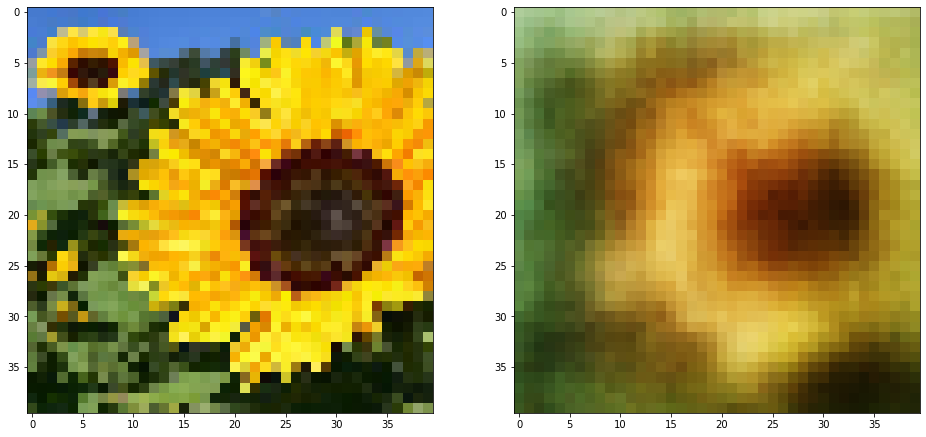

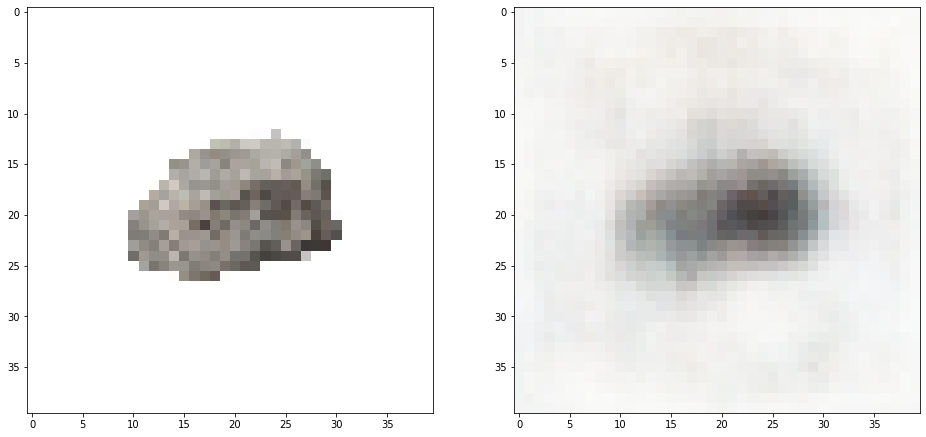

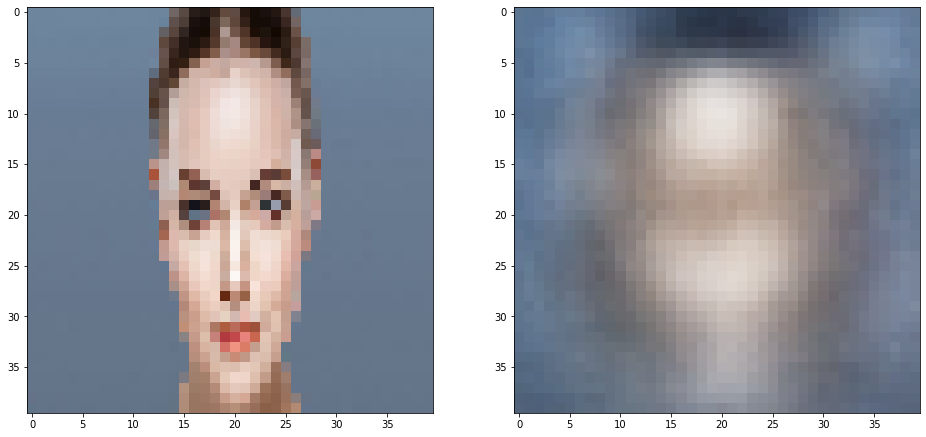

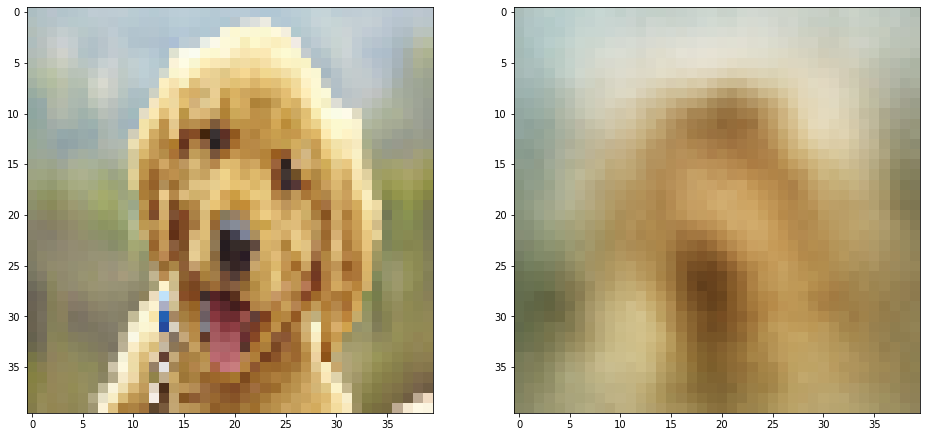

In [ ]:
#ahora vamos a ver que pasa si le pasamos imagenes de paisajes
image1=np.array(Image.open(requests.get("https://www.gardendesign.com/pictures/images/263x300Exact_62x0/site_3/helianthus-yellow-flower-pixabay_11863.jpg", stream=True).raw))
image2=np.array(Image.open(requests.get("https://images.homedepot-static.com/productImages/eb52ce8a-9746-4453-9603-7eaa835c263e/svn/outdoor-essentials-fake-rocks-204923-64_1000.jpg", stream=True).raw))
image3=np.array(Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2017/08/1493458748-beauty-face-517.jpg", stream=True).raw))
image4=np.array(Image.open(requests.get("https://www.dogtime.com/assets/uploads/2011/03/puppy-development-1280x720.jpg", stream=True).raw))

final_shape=(40,40)

for i in range(1,5):
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.imshow(to_size(vars()[f"image{i}"],final_shape))
    aux=to_size(vars()[f"image{i}"],final_shape)
    predict=model.predict(aux[np.newaxis,...])
    plt.subplot(1,2,2)
    plt.imshow(predict[0])



In [ ]:
vars().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', '_sh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', '_i2', 'np', 'plt', 'tf', 'tfds', 'train_test_split', '_i3', 'dataset', '_i4', 'images', 'n', 'j', 'i', '_i5', 'x_train', 'x_test', '_i6', 'input_shape', 'iner_dim', 'model', '_i7', '_i8', '_i9', '_i10', '_i11', '_i12', '_i13', 'factor', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_19', '_i20', '_i21', '_21', '_i22', '_22', '_i23', '_i24', '_i25', '_i26', '_26', '_i27', '_i28', '_28', '_i29', '_29', '_i30', '_i31', '_i32', 'final_shape', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_39', '_i40', '_i41', '_i42', '_42', '_i43', '_i44', '_44', '_i45', '_i46', '_i47', '_47', '_i48', '_i49', 'hist', '_i50', '_i51', '_51', '_i52', '_52', '_i53', '_53', '_i54', '_i55', '_55', '_i56', '_56', '_i57', '_57', '_i58', '_i59', '_59', '_i60', '_i61', '_i62', '_62

In [ ]:
!ffmpeg -f image2 -i /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/%d.png -r 20 /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/video_bueno_1.avi

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
#vamos a probar a meterle los datos con los que hemos estado trabajando del telescopio
#esto no esta del todo bien porque obviamente hemos entrenado la red con imagenes de gatos, pero aun así puede que sea eficaz en eliminar ruido...no creo


# Uso en datos del CTA:

los arrays del cta estan medio vacios, quizá es mejor no hacerlo mediante autoencoders convolucionales, pero vamos a probar ambos

## Cargamos los datos
tenemos dos opciones cargar datos normalizados o los datos sin normalizar...

In [ ]:
ruta_npy_nomalizados="/content/drive/MyDrive/analisis_datos_tfg_inicial_hasta_4_02_21/npy_archivos_tel_1"
autoencoders="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba"
modelos_dir="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/modelos_autoencoders"

In [ ]:
#cargamos los datos 

#lo hacemos primero para gammas
data_gamma=[np.load(f"{ruta_npy_nomalizados}/gamma_{i}.npy") for i in range(3)]
data_gamma=np.concatenate([*data_gamma])


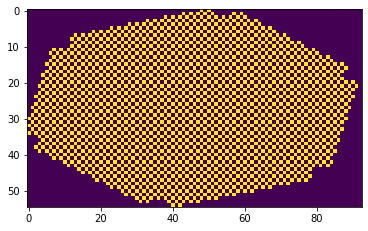

In [ ]:
#necesitamos saber las posiciones de los pixeles para poder extraerlos y recostruirlo despues del autoencoder
pixeles=np.sum(data_gamma,axis=0)
pixeles[pixeles!=0]=1
pixeles[:,-1]=0
plt.imshow(pixeles)
#np.save(f"{autoencoders}/array_pos_pix_telescop.npy",pixeles)

In [ ]:
x_train,x_test=train_test_split(data_gamma,test_size=0.2,random_state=42)

In [ ]:
del data_gamma

## Creamos el autoencoder 
toma la matriz talcula


In [ ]:
#autoencoder muy sencillo
input_shape=x_train[1].shape
iner_dim=13**2
model=tf.keras.Sequential()
#encoder
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
model.add(tf.keras.layers.Dense(iner_dim//1.5,activation="relu"))
 
#decoder
model.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
model.add(tf.keras.layers.Dense(input_shape[0]*input_shape[1],activation="sigmoid"))
model.add(tf.keras.layers.Reshape(target_shape=input_shape))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 5115)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 169)               864604    
_________________________________________________________________
dense_11 (Dense)             (None, 112)               19040     
_________________________________________________________________
dense_12 (Dense)             (None, 169)               19097     
_________________________________________________________________
dense_13 (Dense)             (None, 5115)              869550    
_________________________________________________________________
reshape (Reshape)            (None, 55, 93)            0         
Total params: 1,772,291
Trainable params: 1,772,291
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
hist=model.fit(x_train,x_train,epochs=30,batch_size=64,validation_data=(x_test,x_test))

Epoch 1/30
275/275 [==============================] - 11s 37ms/step - loss: 0.2073 - val_loss: 0.0086
Epoch 2/30
275/275 [==============================] - 10s 36ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 3/30
275/275 [==============================] - 10s 36ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 4/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 5/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 6/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 7/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 8/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 9/30
275/275 [==============================] - 10s 37ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 10/30
275/275 [==============================] - 10s 37ms/step - loss: 0.005

In [ ]:
model.save(f"{modelos_dir}/gamma_autcod_sencillo_full_in_1.h5")

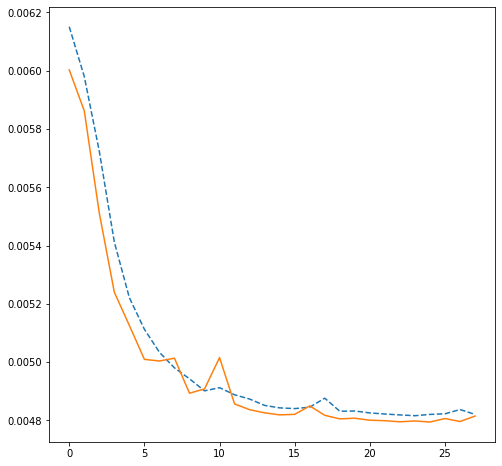

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist.history["loss"][2:],"--")
plt.plot(hist.history["val_loss"][2:])

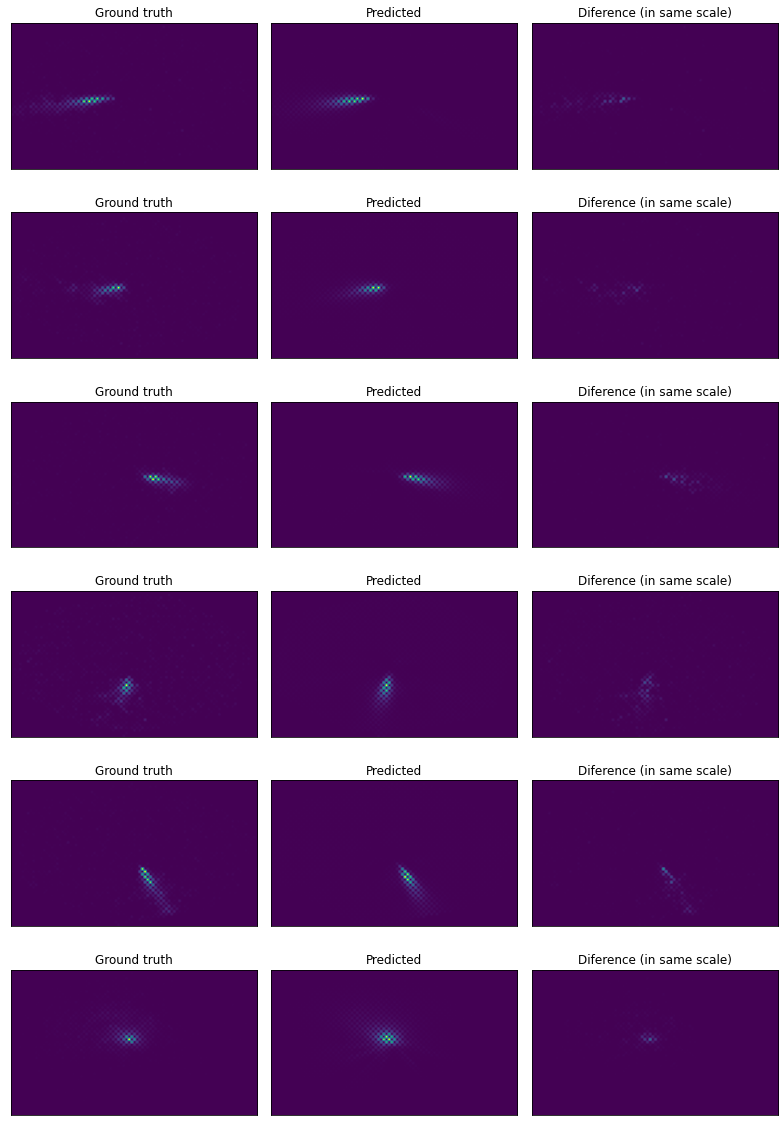

In [ ]:
plt.figure(figsize=(11,16))
k=110
for i in range(6):
    predict=model.predict(x_test[i+k][np.newaxis,...])
    plt.subplot(6,3,i*3+1)
    plt.imshow(x_test[i+k])
    plt.title("Ground truth",fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(6,3,i*3+2)
    plt.imshow(predict[0])

    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted",fontsize=12)
    ax=plt.subplot(6,3,i*3+3)
    plt.imshow(abs(x_test[i+k]-predict[0]),vmax=np.amax(x_test[i+k]))

    #plt.xticks([])
    #plt.yticks([])
    #otra forma de ponerlo
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.title("Diference (in same scale)",fontsize=12)


plt.tight_layout()

## Solo con los pixeles que son distintos de zero

Creo que esto da igual porque los que son siempre cero, los pesos se habrán puesto para que den cero y ya esta, esto queda ahí, pero aun asi, vamos a probar



In [ ]:
#cambiamos los datos a un formato unidimensional
x_train2=np.array([x_train[i][pixeles==1] for i in range(x_train.shape[0])])
x_test2=np.array([x_test[i][pixeles==1] for i in range(x_test.shape[0])])


In [ ]:
#autoencoder muy sencillo
input_shape=x_train2.shape[1]
iner_dim=7**2
model2=tf.keras.Sequential()
#encoder
model2.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model2.add(tf.keras.layers.Dense(input_shape,activation="relu"))
#model2.add(tf.keras.layers.Dense(round(iner_dim*1.1),activation="relu"))
 
#decoder
model2.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
#model2.add(tf.keras.layers.Dense(round(iner_dim*1.1),activation="relu"))
model2.add(tf.keras.layers.Dense(input_shape,activation="sigmoid"))
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1854)              3439170   
_________________________________________________________________
dense_50 (Dense)             (None, 49)                90895     
_________________________________________________________________
dense_51 (Dense)             (None, 1854)              92700     
Total params: 3,622,765
Trainable params: 3,622,765
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy")


In [ ]:
history2=model2.fit(x_train2,x_train2,epochs=30,batch_size=64,validation_data=(x_test2,x_test2))

Epoch 1/30
275/275 [==============================] - 12s 42ms/step - loss: 0.2089 - val_loss: 0.0181
Epoch 2/30
275/275 [==============================] - 11s 41ms/step - loss: 0.0172 - val_loss: 0.0163
Epoch 3/30
275/275 [==============================] - 11s 41ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 4/30
275/275 [==============================] - 11s 42ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 5/30
275/275 [==============================] - 11s 42ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 6/30
275/275 [==============================] - 11s 42ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 7/30
275/275 [==============================] - 11s 41ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 8/30
275/275 [==============================] - 11s 41ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 9/30
275/275 [==============================] - 11s 42ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 10/30
275/275 [==============================] - 11s 42ms/step - loss: 0.013

In [ ]:
model2.save(f"{modelos_dir}/gamma_autcod_sencillo_solo_difs_cero_in_2mascompr.h5")

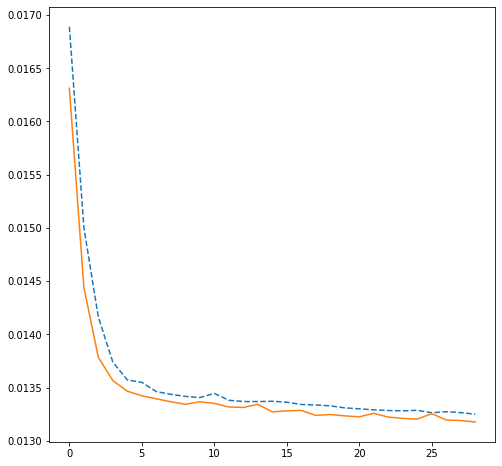

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history2.history["loss"][1:],"--")
plt.plot(history2.history["val_loss"][1:])

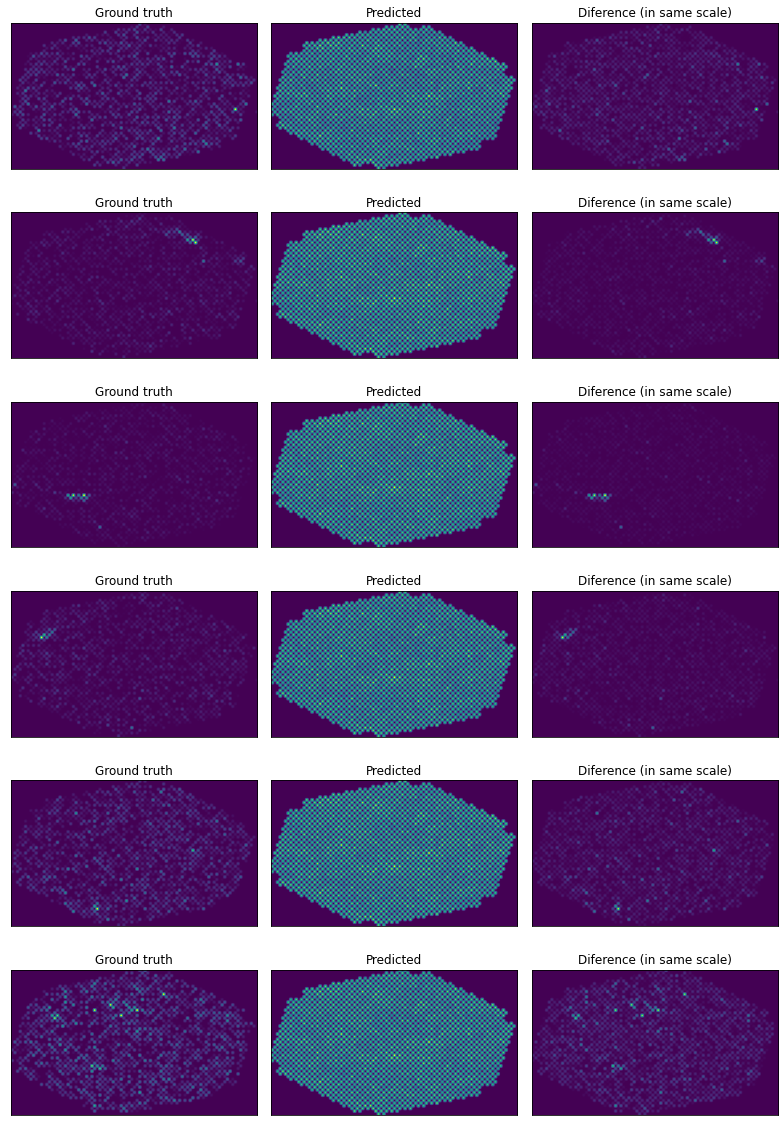

In [ ]:
plt.figure(figsize=(11,16))
k=187
for i in range(6):
    predict=model2.predict(x_test2[i+k][np.newaxis,...])
    plt.subplot(6,3,i*3+1)
    #aux=np.zeros([*x_train[0].shape])
    #aux[pixeles==1]=x_test2[i+k]
    #plt.imshow(aux)
    plt.imshow(x_test[i+k])
    plt.title("Ground truth",fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(6,3,i*3+2)
    aux=np.zeros([*x_train[0].shape])
    aux[pixeles==1]=predict[0]
    plt.imshow(aux)
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted",fontsize=12)
    ax=plt.subplot(6,3,i*3+3)
    plt.imshow(abs(x_test[i+k]-aux),vmax=np.amax(x_test[i+k]))

    #plt.xticks([])
    #plt.yticks([])
    #otra forma de ponerlo
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.title("Diference (in same scale)",fontsize=12)


plt.tight_layout()

## Autoencoder convolucional

In [ ]:
#tenemos que añadirle una dimension a los datos, el channel
x_train1=x_train[:,3:,1:][...,np.newaxis]
x_test1=x_test[:,3:,1:][...,np.newaxis]
#este cambio lo hacemos para que la dimension sea par y lueg oen todo el tema de los poolings no tengamos perdida de dimensiones, 
#estamos sacrificando solo una columna no pasa na

In [ ]:
#creamos un autoencoder convolucional
input_shape=x_train1[1].shape
input_img = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:

autoencoder.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 52, 92, 1)]       0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 52, 92, 16)        160       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 26, 46, 16)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 26, 46, 8)         1160      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13, 23, 8)         0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 13, 23, 8)         584       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 7, 12, 8)          0  

In [ ]:
hist3=autoencoder.fit(x_train1,x_train1,epochs=5,batch_size=64,validation_data=(x_test1,x_test1))

In [ ]:
autoencoder.save(f"{modelos_dir}/gamma_conv_autocod_1.h5")

In [ ]:
#guardamos el modelo


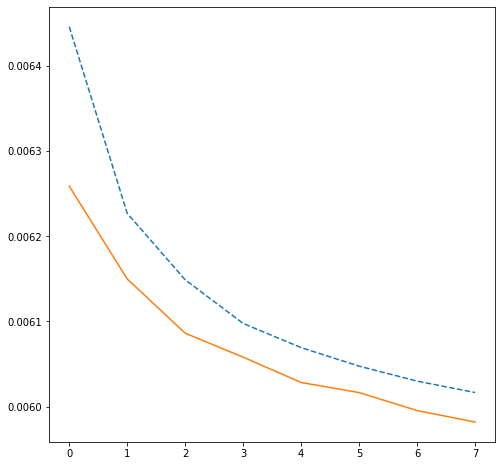

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(hist3.history["loss"][2:],"--")
plt.plot(hist3.history["val_loss"][2:])

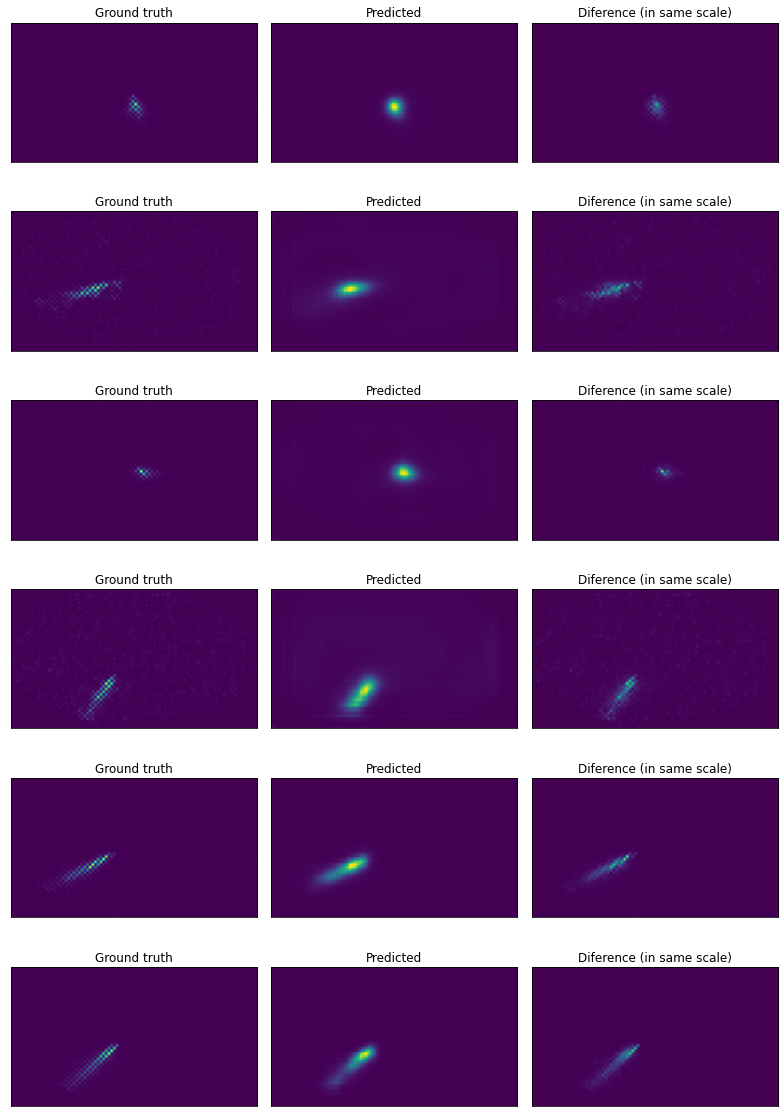

In [ ]:
plt.figure(figsize=(11,16))
k=0
for i in range(6):
    predict=autoencoder.predict(x_test1[i+k][np.newaxis,...])
    plt.subplot(6,3,i*3+1)
    plt.imshow(x_test1[i+k][:,:,0])
    plt.title("Ground truth",fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(6,3,i*3+2)
    plt.imshow(predict[0][:,:,0])

    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted",fontsize=12)
    ax=plt.subplot(6,3,i*3+3)
    plt.imshow(abs(x_test1[i+k][:,:,0]-predict[0][:,:,0]),vmax=np.amax(x_test1[i+k]))

    #plt.xticks([])
    #plt.yticks([])
    #otra forma de ponerlo
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.title("Diference (in same scale)",fontsize=12)


plt.tight_layout()

#(Iron) Hasta ahora a sido con gamma, y parece que da muy buenos resultados:
Vamos a probar con el Iron.

In [ ]:
ruta_npy_nomalizados="/content/drive/MyDrive/analisis_datos_tfg_inicial_hasta_4_02_21/npy_archivos_tel_1"
autoencoders="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba"
modelos_dir="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/modelos_autoencoders"

In [ ]:
#cargamos los datos 

#lo hacemos primero para gammas
data_iron=np.load(f"{ruta_npy_nomalizados}/iron.npy")


True

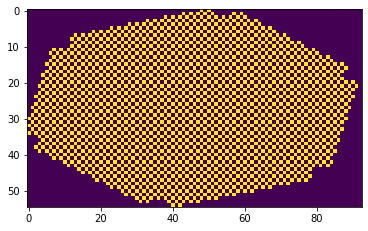

In [ ]:
#necesitamos saber las posiciones de los pixeles para poder extraerlos y recostruirlo despues del autoencoder
pixeles=np.sum(data_iron,axis=0)
pixeles[pixeles!=0]=1
pixeles[:,-1]=0
plt.imshow(pixeles)
#np.save(f"{autoencoders}/array_pos_pix_telescop.npy",pixeles)
#pixeles2=np.load(f"{autoencoders}/array_pos_pix_telescop.npy")
#np.all(pixeles==pixeles2)

In [ ]:
x_train,x_test=train_test_split(data_iron,test_size=0.2,random_state=42)

In [ ]:
del data_iron

## Solo con los pixeles que son distintos de zero (IRON)





Creo que esto da igual porque los que son siempre cero, los pesos se habrán puesto para que den cero y ya esta, esto queda ahí, pero aun asi, vamos a probar



In [ ]:
#cambiamos los datos a un formato unidimensional
x_train2=np.array([x_train[i][pixeles==1] for i in range(x_train.shape[0])])
x_test2=np.array([x_test[i][pixeles==1] for i in range(x_test.shape[0])])
y_train2=x_train2.copy()
y_train2[y_train2<= y_train2.mean()]=0
y_test2=x_test2.copy()
y_test2[y_test2<= y_test2.mean()]=0


In [ ]:
#autoencoder muy sencillo
input_shape=x_train2.shape[1]
iner_dim=14**2
model2=tf.keras.Sequential()
#encoder
model2.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model2.add(tf.keras.layers.Dense(input_shape,activation="relu"))
model2.add(tf.keras.layers.Dense(round(iner_dim*1.1),activation="relu"))
 
#decoder
model2.add(tf.keras.layers.Dense(iner_dim,activation="relu"))
model2.add(tf.keras.layers.Dense(round(iner_dim*1.1),activation="relu"))
model2.add(tf.keras.layers.Dense(input_shape,activation="sigmoid"))
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 1854)              3439170   
_________________________________________________________________
dense_58 (Dense)             (None, 216)               400680    
_________________________________________________________________
dense_59 (Dense)             (None, 196)               42532     
_________________________________________________________________
dense_60 (Dense)             (None, 216)               42552     
_________________________________________________________________
dense_61 (Dense)             (None, 1854)              402318    
Total params: 4,327,252
Trainable params: 4,327,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy")


In [ ]:
history2=model2.fit(x_train2,x_train2,epochs=40,batch_size=64,validation_data=(x_test2,x_test2))
#history2=model2.fit(x_train2,y_train2,epochs=20,batch_size=64,validation_data=(x_test2,y_test2))

Epoch 1/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 2/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 3/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 4/40
183/183 [==============================] - 9s 50ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 5/40
183/183 [==============================] - 9s 50ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 6/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 7/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 8/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0825 - val_loss: 0.0828
Epoch 9/40
183/183 [==============================] - 9s 51ms/step - loss: 0.0823 - val_loss: 0.0828
Epoch 10/40
183/183 [==============================] - 9s 50ms/step - loss: 0.0823 - val_lo

In [ ]:
model2.save(f"{modelos_dir}/iron_autcod_sencillo_solo_difs_cero_in_1.h5")

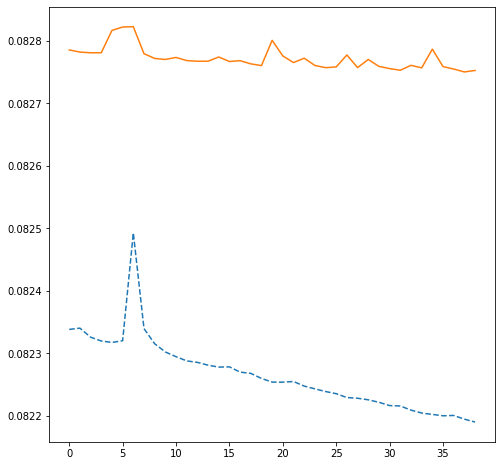

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history2.history["loss"][1:],"--")
plt.plot(history2.history["val_loss"][1:])

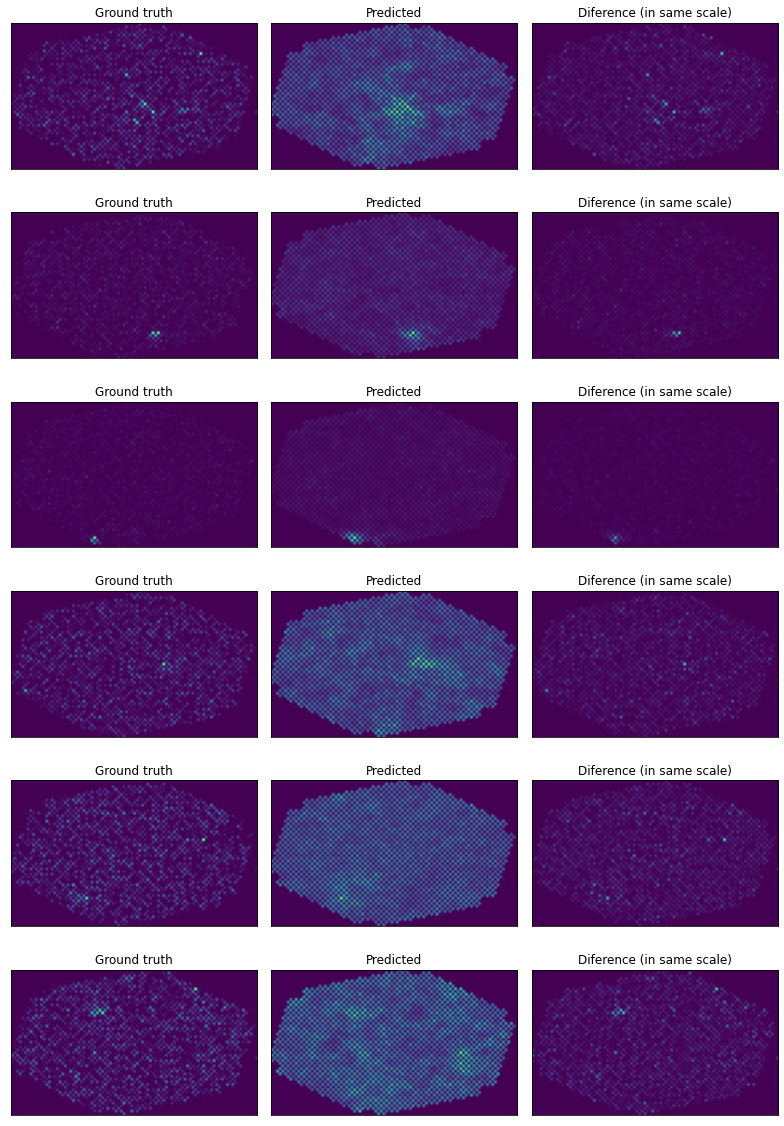

In [ ]:
plt.figure(figsize=(11,16))
k=18
for i in range(6):
    predict=model2.predict(x_test2[i+k][np.newaxis,...])
    plt.subplot(6,3,i*3+1)
    #aux=np.zeros([*x_train[0].shape])
    #aux[pixeles==1]=x_test2[i+k]
    #plt.imshow(aux)
    plt.imshow(x_test[i+k])
    plt.title("Ground truth",fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(6,3,i*3+2)
    aux=np.zeros([*x_train[0].shape])
    aux[pixeles==1]=predict[0]
    plt.imshow(aux)
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted",fontsize=12)
    ax=plt.subplot(6,3,i*3+3)
    plt.imshow(abs(x_test[i+k]-aux),vmax=np.amax(x_test[i+k]))

    #plt.xticks([])
    #plt.yticks([])
    #otra forma de ponerlo
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.title("Diference (in same scale)",fontsize=12)


plt.tight_layout()

# (Electron) Seguimos probando:

In [ ]:
ruta_npy_nomalizados="/content/drive/MyDrive/analisis_datos_tfg_inicial_hasta_4_02_21/npy_archivos_tel_1"
autoencoders="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba"
modelos_dir="/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/modelos_autoencoders"

In [ ]:
#cargamos los datos 

#lo hacemos primero para gammas
data_electron=np.load(f"{ruta_npy_nomalizados}/electron.npy")


True

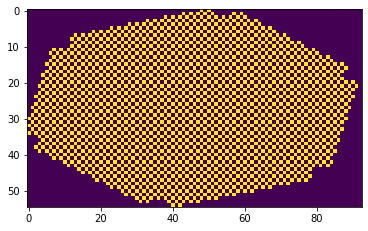

In [ ]:
#necesitamos saber las posiciones de los pixeles para poder extraerlos y recostruirlo despues del autoencoder
pixeles=np.sum(data_electron,axis=0)
pixeles[pixeles!=0]=1
pixeles[:,-1]=0
plt.imshow(pixeles)
#np.save(f"{autoencoders}/array_pos_pix_telescop.npy",pixeles)
#pixeles2=np.load(f"{autoencoders}/array_pos_pix_telescop.npy")
#np.all(pixeles==pixeles2)

In [ ]:
x_train,x_test=train_test_split(data_electron,test_size=0.2,random_state=42)

In [ ]:
del data_electron

In [ ]:
#probamos un nuevo modelo

encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

# Saturacion autoencoder convoluicional

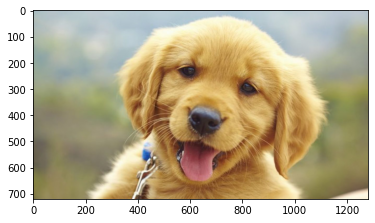

In [ ]:
image=np.array(Image.open(requests.get("https://www.dogtime.com/assets/uploads/2011/03/puppy-development-1280x720.jpg", stream=True).raw))/255.
plt.imshow(image)

In [ ]:
image

In [ ]:
#creamos un autoencoder convolucional por partes
input_shape=image.shape
input_img = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
model_encoder=tf.keras.Model(inputs=input_img,outputs=encoded)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
input_autoencoder=tf.keras.Input(shape=input_shape)
x=model_encoder(input_autoencoder)
x = tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x= tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
#x = tf.keras.layers.Flatten()(x)
#decoded=tf.keras.layers.LocallyConnected2D(1,(2,4),activation="relu",padding="valid")(x)
#decoded=tf.keras.layers.Reshape(input_shape)
#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(input_shape[0]*input_shape[1])(x)
#decoded=tf.keras.layers.Reshape(target_shape=input_shape)(x)


autoencoder = tf.keras.Model(input_autoencoder, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 720, 1280, 3)]    0         
_________________________________________________________________
model_9 (Functional)         (None, 90, 160, 16)       65552     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 90, 160, 12)       1740      
_________________________________________________________________
up_sampling2d_15 (UpSampling (None, 180, 320, 12)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 180, 320, 16)      1744      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 180, 320, 16)      2320      
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 360, 640, 16)      0  

In [ ]:
# call back apra registrar la evolucion

#vamos a definir nuestra propia callback para ver como predice sobre una imagen epoca tras epoca, como mejora y como se pasa 
class my_callback(tf.keras.callbacks.Callback):
    #creo que vamos a tener que crear un __init__ para hacer lo de pasar una imagen
    def __init__(self,imagen_array):
        #esto creo que es para que se ereden todas las cosas
        #super(my_callback, self).__init__()
        self.imag=imagen_array
 
    def on_epoch_end(self, epoch, logs=None):
        #queremos probar el modelo en una imagen y queremos que compute
        aux=self.model.predict(self.imag[np.newaxis,...])
        plt.figure(figsize=(14,6))
        plt.subplot(1,2,1)
        plt.imshow(self.imag)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1,2,2)
        plt.imshow(aux[0],vmin=0,vmax=1)
        plt.title(f"Época: {epoch}",fontsize=13)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/aux_ims/{epoch}.png")
        plt.close()

In [ ]:
x_train=image[np.newaxis,...]

In [ ]:
llamada_mia=my_callback(image)

In [ ]:
hist=autoencoder.fit(x=x_train,y=x_train,epochs=230,batch_size=1,callbacks=[llamada_mia])
 
!ffmpeg -f image2 -i /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/aux_ims/%d.png -r 20 /content/drive/MyDrive/pruebas_clasificacion_tfg_26_02_2021/autoencoders_prueba/sat_convautoenc_1.avi

Epoch 1/230
1/1 [==============================] - 3s 3s/step - loss: 0.7126
Epoch 2/230
1/1 [==============================] - 3s 3s/step - loss: 0.7344
Epoch 3/230
1/1 [==============================] - 3s 3s/step - loss: 0.7444
Epoch 4/230
1/1 [==============================] - 3s 3s/step - loss: 0.7445
Epoch 5/230
1/1 [==============================] - 3s 3s/step - loss: 0.7373
Epoch 6/230
1/1 [==============================] - 3s 3s/step - loss: 0.7238
Epoch 7/230
1/1 [==============================] - 3s 3s/step - loss: 0.7055
Epoch 8/230
1/1 [==============================] - 3s 3s/step - loss: 0.6846
Epoch 9/230
1/1 [==============================] - 3s 3s/step - loss: 0.6630
Epoch 10/230
1/1 [==============================] - 3s 3s/step - loss: 0.6446
Epoch 11/230
1/1 [==============================] - 3s 3s/step - loss: 0.6341


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12/230
1/1 [==============================] - 3s 3s/step - loss: 0.6443


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13/230
1/1 [==============================] - 3s 3s/step - loss: 0.6560


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14/230
1/1 [==============================] - 3s 3s/step - loss: 0.6377
Epoch 15/230
1/1 [==============================] - 3s 3s/step - loss: 0.6269
Epoch 16/230
1/1 [==============================] - 3s 3s/step - loss: 0.6249
Epoch 17/230
1/1 [==============================] - 4s 4s/step - loss: 0.6256
Epoch 18/230
1/1 [==============================] - 6s 6s/step - loss: 0.6269
Epoch 19/230
1/1 [==============================] - 4s 4s/step - loss: 0.6275
Epoch 20/230
1/1 [==============================] - 3s 3s/step - loss: 0.6259
Epoch 21/230
1/1 [==============================] - 3s 3s/step - loss: 0.6229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22/230
1/1 [==============================] - 3s 3s/step - loss: 0.6211


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23/230
1/1 [==============================] - 3s 3s/step - loss: 0.6251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24/230
1/1 [==============================] - 3s 3s/step - loss: 0.6260


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25/230
1/1 [==============================] - 3s 3s/step - loss: 0.6216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26/230
1/1 [==============================] - 3s 3s/step - loss: 0.6220


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27/230
1/1 [==============================] - 4s 4s/step - loss: 0.6233


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28/230
1/1 [==============================] - 3s 3s/step - loss: 0.6237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29/230
1/1 [==============================] - 3s 3s/step - loss: 0.6228


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30/230
1/1 [==============================] - 3s 3s/step - loss: 0.6209


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31/230
1/1 [==============================] - 3s 3s/step - loss: 0.6190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32/230
1/1 [==============================] - 3s 3s/step - loss: 0.6182


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33/230
1/1 [==============================] - 3s 3s/step - loss: 0.6192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34/230
1/1 [==============================] - 3s 3s/step - loss: 0.6180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35/230
1/1 [==============================] - 3s 3s/step - loss: 0.6164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36/230
1/1 [==============================] - 3s 3s/step - loss: 0.6161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37/230
1/1 [==============================] - 3s 3s/step - loss: 0.6161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38/230
1/1 [==============================] - 3s 3s/step - loss: 0.6159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39/230
1/1 [==============================] - 3s 3s/step - loss: 0.6154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40/230
1/1 [==============================] - 3s 3s/step - loss: 0.6147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41/230
1/1 [==============================] - 3s 3s/step - loss: 0.6143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42/230
1/1 [==============================] - 4s 4s/step - loss: 0.6141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43/230
1/1 [==============================] - 3s 3s/step - loss: 0.6142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44/230
1/1 [==============================] - 3s 3s/step - loss: 0.6141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45/230
1/1 [==============================] - 3s 3s/step - loss: 0.6136


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46/230
1/1 [==============================] - 3s 3s/step - loss: 0.6130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47/230
1/1 [==============================] - 3s 3s/step - loss: 0.6127


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48/230
1/1 [==============================] - 3s 3s/step - loss: 0.6126


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49/230
1/1 [==============================] - 3s 3s/step - loss: 0.6125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50/230
1/1 [==============================] - 3s 3s/step - loss: 0.6122


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 51/230
1/1 [==============================] - 3s 3s/step - loss: 0.6117


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 52/230
1/1 [==============================] - 3s 3s/step - loss: 0.6114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 53/230
1/1 [==============================] - 3s 3s/step - loss: 0.6113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 54/230
1/1 [==============================] - 3s 3s/step - loss: 0.6112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55/230
1/1 [==============================] - 3s 3s/step - loss: 0.6108


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 56/230
1/1 [==============================] - 3s 3s/step - loss: 0.6104


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 57/230
1/1 [==============================] - 3s 3s/step - loss: 0.6102


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 58/230
1/1 [==============================] - 3s 3s/step - loss: 0.6099


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 59/230
1/1 [==============================] - 3s 3s/step - loss: 0.6096


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 60/230
1/1 [==============================] - 3s 3s/step - loss: 0.6093


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 61/230
1/1 [==============================] - 3s 3s/step - loss: 0.6090


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 62/230
1/1 [==============================] - 3s 3s/step - loss: 0.6088


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 63/230
1/1 [==============================] - 3s 3s/step - loss: 0.6085


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 64/230
1/1 [==============================] - 3s 3s/step - loss: 0.6084


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65/230
1/1 [==============================] - 3s 3s/step - loss: 0.6079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 66/230
1/1 [==============================] - 3s 3s/step - loss: 0.6078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 67/230
1/1 [==============================] - 3s 3s/step - loss: 0.6076


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 68/230
1/1 [==============================] - 3s 3s/step - loss: 0.6072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 69/230
1/1 [==============================] - 3s 3s/step - loss: 0.6072


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 70/230
1/1 [==============================] - 3s 3s/step - loss: 0.6069


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 71/230
1/1 [==============================] - 3s 3s/step - loss: 0.6065


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 72/230
1/1 [==============================] - 3s 3s/step - loss: 0.6070


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 73/230
1/1 [==============================] - 3s 3s/step - loss: 0.6060


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 74/230
1/1 [==============================] - 3s 3s/step - loss: 0.6065


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75/230
1/1 [==============================] - 3s 3s/step - loss: 0.6069


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 76/230
1/1 [==============================] - 3s 3s/step - loss: 0.6065


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 77/230
1/1 [==============================] - 3s 3s/step - loss: 0.6059


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 78/230
1/1 [==============================] - 3s 3s/step - loss: 0.6058


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 79/230
1/1 [==============================] - 3s 3s/step - loss: 0.6054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 80/230
1/1 [==============================] - 3s 3s/step - loss: 0.6055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 81/230
1/1 [==============================] - 3s 3s/step - loss: 0.6052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 82/230
1/1 [==============================] - 3s 3s/step - loss: 0.6049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 83/230
1/1 [==============================] - 3s 3s/step - loss: 0.6051


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 84/230
1/1 [==============================] - 3s 3s/step - loss: 0.6054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 85/230
1/1 [==============================] - 3s 3s/step - loss: 0.6047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 86/230
1/1 [==============================] - 3s 3s/step - loss: 0.6055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 87/230
1/1 [==============================] - 3s 3s/step - loss: 0.6059


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 88/230
1/1 [==============================] - 3s 3s/step - loss: 0.6047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 89/230
1/1 [==============================] - 3s 3s/step - loss: 0.6049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 90/230
1/1 [==============================] - 3s 3s/step - loss: 0.6048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 91/230
1/1 [==============================] - 3s 3s/step - loss: 0.6047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 92/230
1/1 [==============================] - 3s 3s/step - loss: 0.6051


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 93/230
1/1 [==============================] - 3s 3s/step - loss: 0.6043


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 94/230
1/1 [==============================] - 3s 3s/step - loss: 0.6047


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 95/230
1/1 [==============================] - 3s 3s/step - loss: 0.6046


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 96/230
1/1 [==============================] - 3s 3s/step - loss: 0.6043


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 97/230
1/1 [==============================] - 3s 3s/step - loss: 0.6044


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 98/230
1/1 [==============================] - 3s 3s/step - loss: 0.6038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 99/230
1/1 [==============================] - 3s 3s/step - loss: 0.6043


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 100/230
1/1 [==============================] - 3s 3s/step - loss: 0.6038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 101/230
1/1 [==============================] - 3s 3s/step - loss: 0.6038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 102/230
1/1 [==============================] - 3s 3s/step - loss: 0.6038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 103/230
1/1 [==============================] - 3s 3s/step - loss: 0.6033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 104/230
1/1 [==============================] - 3s 3s/step - loss: 0.6037


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 105/230
1/1 [==============================] - 3s 3s/step - loss: 0.6033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 106/230
1/1 [==============================] - 3s 3s/step - loss: 0.6037


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 107/230
1/1 [==============================] - 3s 3s/step - loss: 0.6029


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 108/230
1/1 [==============================] - 3s 3s/step - loss: 0.6030


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 109/230
1/1 [==============================] - 3s 3s/step - loss: 0.6028


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 110/230
1/1 [==============================] - 3s 3s/step - loss: 0.6027


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 111/230
1/1 [==============================] - 3s 3s/step - loss: 0.6025


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 112/230
1/1 [==============================] - 3s 3s/step - loss: 0.6026


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 113/230
1/1 [==============================] - 3s 3s/step - loss: 0.6024


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 114/230
1/1 [==============================] - 3s 3s/step - loss: 0.6023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 115/230
1/1 [==============================] - 3s 3s/step - loss: 0.6023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 116/230
1/1 [==============================] - 3s 3s/step - loss: 0.6021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 117/230
1/1 [==============================] - 3s 3s/step - loss: 0.6020


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 118/230
1/1 [==============================] - 3s 3s/step - loss: 0.6019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 119/230
1/1 [==============================] - 3s 3s/step - loss: 0.6018


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 120/230
1/1 [==============================] - 3s 3s/step - loss: 0.6019


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 121/230
1/1 [==============================] - 3s 3s/step - loss: 0.6016


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 122/230
1/1 [==============================] - 3s 3s/step - loss: 0.6015


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 123/230
1/1 [==============================] - 3s 3s/step - loss: 0.6013


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 124/230
1/1 [==============================] - 3s 3s/step - loss: 0.6011


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 125/230
1/1 [==============================] - 3s 3s/step - loss: 0.6010


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 126/230
1/1 [==============================] - 3s 3s/step - loss: 0.6010


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 127/230
1/1 [==============================] - 3s 3s/step - loss: 0.6006


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 128/230
1/1 [==============================] - 3s 3s/step - loss: 0.6002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 129/230
1/1 [==============================] - 3s 3s/step - loss: 0.6000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 130/230
1/1 [==============================] - 3s 3s/step - loss: 0.5995


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 131/230
1/1 [==============================] - 3s 3s/step - loss: 0.5989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 132/230
1/1 [==============================] - 3s 3s/step - loss: 0.5983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 133/230
1/1 [==============================] - 3s 3s/step - loss: 0.5974


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 134/230
1/1 [==============================] - 3s 3s/step - loss: 0.5965


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 135/230
1/1 [==============================] - 3s 3s/step - loss: 0.5956


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 136/230
1/1 [==============================] - 3s 3s/step - loss: 0.5952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 137/230
1/1 [==============================] - 3s 3s/step - loss: 0.5967


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 138/230
1/1 [==============================] - 3s 3s/step - loss: 0.5952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 139/230
1/1 [==============================] - 3s 3s/step - loss: 0.5938


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 140/230
1/1 [==============================] - 3s 3s/step - loss: 0.5941


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 141/230
1/1 [==============================] - 3s 3s/step - loss: 0.5930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 142/230
1/1 [==============================] - 3s 3s/step - loss: 0.5923


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 143/230
1/1 [==============================] - 3s 3s/step - loss: 0.5914


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 144/230
1/1 [==============================] - 3s 3s/step - loss: 0.5915


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 145/230
1/1 [==============================] - 3s 3s/step - loss: 0.5909


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 146/230
1/1 [==============================] - 3s 3s/step - loss: 0.5904


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 147/230
1/1 [==============================] - 3s 3s/step - loss: 0.5899


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 148/230
1/1 [==============================] - 3s 3s/step - loss: 0.5899


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 149/230
1/1 [==============================] - 4s 4s/step - loss: 0.5897


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 150/230
1/1 [==============================] - 7s 7s/step - loss: 0.5895


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 151/230
1/1 [==============================] - 5s 5s/step - loss: 0.5888


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 152/230
1/1 [==============================] - 3s 3s/step - loss: 0.5885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 153/230
1/1 [==============================] - 3s 3s/step - loss: 0.5885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 154/230
1/1 [==============================] - 3s 3s/step - loss: 0.5886


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 155/230
1/1 [==============================] - 3s 3s/step - loss: 0.5891


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 156/230
1/1 [==============================] - 3s 3s/step - loss: 0.5884


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 157/230
1/1 [==============================] - 4s 4s/step - loss: 0.5888


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 158/230
1/1 [==============================] - 3s 3s/step - loss: 0.5882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 159/230
1/1 [==============================] - 3s 3s/step - loss: 0.5884


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 160/230
1/1 [==============================] - 3s 3s/step - loss: 0.5882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 161/230
1/1 [==============================] - 3s 3s/step - loss: 0.5877


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 162/230
1/1 [==============================] - 3s 3s/step - loss: 0.5873


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 163/230
1/1 [==============================] - 3s 3s/step - loss: 0.5872


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 164/230
1/1 [==============================] - 3s 3s/step - loss: 0.5873


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 165/230
1/1 [==============================] - 3s 3s/step - loss: 0.5871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 166/230
1/1 [==============================] - 3s 3s/step - loss: 0.5868


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 167/230
1/1 [==============================] - 3s 3s/step - loss: 0.5866


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 168/230
1/1 [==============================] - 3s 3s/step - loss: 0.5864


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 169/230
1/1 [==============================] - 3s 3s/step - loss: 0.5863


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 170/230
1/1 [==============================] - 3s 3s/step - loss: 0.5863


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 171/230
1/1 [==============================] - 3s 3s/step - loss: 0.5861


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 172/230
1/1 [==============================] - 3s 3s/step - loss: 0.5861


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 173/230
1/1 [==============================] - 3s 3s/step - loss: 0.5859


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 174/230
1/1 [==============================] - 3s 3s/step - loss: 0.5858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 175/230
1/1 [==============================] - 3s 3s/step - loss: 0.5857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 176/230
1/1 [==============================] - 3s 3s/step - loss: 0.5857


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 177/230
1/1 [==============================] - 3s 3s/step - loss: 0.5856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 178/230
1/1 [==============================] - 3s 3s/step - loss: 0.5855


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 179/230
1/1 [==============================] - 3s 3s/step - loss: 0.5855


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 180/230
1/1 [==============================] - 3s 3s/step - loss: 0.5854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 181/230
1/1 [==============================] - 3s 3s/step - loss: 0.5854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 182/230
1/1 [==============================] - 3s 3s/step - loss: 0.5853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 183/230
1/1 [==============================] - 3s 3s/step - loss: 0.5852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 184/230
1/1 [==============================] - 3s 3s/step - loss: 0.5853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 185/230
1/1 [==============================] - 3s 3s/step - loss: 0.5852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 186/230
1/1 [==============================] - 3s 3s/step - loss: 0.5851


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 187/230
1/1 [==============================] - 4s 4s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 188/230
1/1 [==============================] - 3s 3s/step - loss: 0.5853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 189/230
1/1 [==============================] - 3s 3s/step - loss: 0.5854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 190/230
1/1 [==============================] - 3s 3s/step - loss: 0.5860


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 191/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 192/230
1/1 [==============================] - 3s 3s/step - loss: 0.5862


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 193/230
1/1 [==============================] - 3s 3s/step - loss: 0.5885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 194/230
1/1 [==============================] - 3s 3s/step - loss: 0.5864


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 195/230
1/1 [==============================] - 3s 3s/step - loss: 0.5871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 196/230
1/1 [==============================] - 3s 3s/step - loss: 0.5856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 197/230
1/1 [==============================] - 3s 3s/step - loss: 0.5859


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 198/230
1/1 [==============================] - 3s 3s/step - loss: 0.5858


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 199/230
1/1 [==============================] - 3s 3s/step - loss: 0.5854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 200/230
1/1 [==============================] - 3s 3s/step - loss: 0.5856


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 201/230
1/1 [==============================] - 3s 3s/step - loss: 0.5853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 202/230
1/1 [==============================] - 4s 4s/step - loss: 0.5852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 203/230
1/1 [==============================] - 3s 3s/step - loss: 0.5854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 204/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 205/230
1/1 [==============================] - 3s 3s/step - loss: 0.5852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 206/230
1/1 [==============================] - 3s 3s/step - loss: 0.5853


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 207/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 208/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 209/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 210/230
1/1 [==============================] - 3s 3s/step - loss: 0.5849


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 211/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 212/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 213/230
1/1 [==============================] - 3s 3s/step - loss: 0.5848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 214/230
1/1 [==============================] - 3s 3s/step - loss: 0.5850


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 215/230
1/1 [==============================] - 3s 3s/step - loss: 0.5848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 216/230
1/1 [==============================] - 3s 3s/step - loss: 0.5847


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 217/230
1/1 [==============================] - 3s 3s/step - loss: 0.5848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 218/230
1/1 [==============================] - 3s 3s/step - loss: 0.5848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 219/230
1/1 [==============================] - 3s 3s/step - loss: 0.5846


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 220/230
1/1 [==============================] - 3s 3s/step - loss: 0.5848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 221/230
1/1 [==============================] - 3s 3s/step - loss: 0.5847


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 222/230
1/1 [==============================] - 3s 3s/step - loss: 0.5846


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 223/230
1/1 [==============================] - 3s 3s/step - loss: 0.5847


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 224/230
1/1 [==============================] - 3s 3s/step - loss: 0.5845


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 225/230
1/1 [==============================] - 3s 3s/step - loss: 0.5846


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 226/230
1/1 [==============================] - 3s 3s/step - loss: 0.5846


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 227/230
1/1 [==============================] - 3s 3s/step - loss: 0.5844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 228/230
1/1 [==============================] - 3s 3s/step - loss: 0.5845


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 229/230
1/1 [==============================] - 3s 3s/step - loss: 0.5844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 230/230
1/1 [==============================] - 3s 3s/step - loss: 0.5844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib